>### Name : Weerasinghe K.N. <br>Index No : 190672T

In [21]:
import numpy as np
from scipy . optimize import minimize
from scipy import linalg
import matplotlib . pyplot as plt
from math import sqrt

(3, 4, 2.82843)


ValueError: x and y must have same first dimension, but have shapes (50,) and (100, 2)

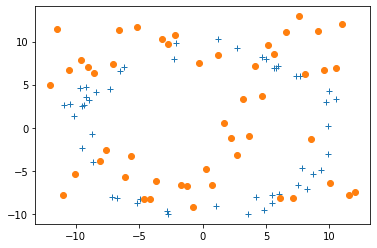

In [22]:
# np . random . seed ( 0 )
N = 100
half_n = N// 2
r = 10
s = r/16
t = np.random.uniform(0,2*np.pi,half_n)
n = s*np.random.randn (half_n)
x,y = (r+n)*np.cos(t),(r+n)*np.sin(t)
X_circ = np.hstack((x.reshape(half_n,1),y.reshape(half_n,1)))
m, b = 1,2
plt.plot(x,y,"+",label="noisy channel")
x1 = np.linspace(-12,12,half_n)
y1 = m*x+b+s*np.random.randn(half_n)
X_line = np.hstack((x1.reshape(half_n,1),y1.reshape(half_n,1)))
X = np.vstack((X_circ,X_line))

def get_circle(x1,y1,x2,y2,x3,y3):
    x12 = x1-x2
    x13 = x1-x3
    y12 = y1-y2
    y13 = y1 - y3
 
    y31 = y3-y1
    y21 = y2-y1
 
    x31 = x3-x1
    x21 = x2-x1
 
    sx13 = pow(x1, 2) - pow(x3, 2)
    sy13 = pow(y1, 2) - pow(y3, 2)
    sx21 = pow(x2, 2) - pow(x1, 2)
    sy21 = pow(y2, 2) - pow(y1, 2)
 
    f = (((sx13) * (x12) + (sy13) *
          (x12) + (sx21) * (x13) +
          (sy21) * (x13)) // (2 *
          ((y31) * (x12) - (y21) * (x13))))
             
    g = (((sx13) * (y12) + (sy13) * (y12) +
          (sx21) * (y13) + (sy21) * (y13)) //
          (2 * ((x31) * (y12) - (x21) * (y13))))
 
    c = (-pow(x1, 2) - pow(y1, 2) -
         2 * g * x1 - 2 * f * y1)

    h = -g
    k = -f
    sqr_of_r = h * h + k * k - c
 
    r = round(sqrt(sqr_of_r), 5)
    return(h,k,r)

def cand_circ(X):
      x_m,y_m=np.mean(X[:,0]),np.mean(X[:,1])
      center=x_m,y_m

      def radius(x,y):
            return np.sqrt((x-x_m)**2+(y-y_m)**2)
      def alg(a):
            return radius(*a)-np.mea(radius(*a))

      c2,a=optimize.leastsq(alg,center)
      x,y=c2
      r_i=radius(*c2)
      r=np.mean(r_i)
      return([x,y,r])



plt.plot(x1,y1,"o",label="noisy channel 2")
plt.plot(x+x1,X,label="noisy channel 2")
plt.show()
